# Credit card offer

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

## Define a goal

**GOAL: Know if a customer will accept a credit card offer or not.**

## Get data

In [2]:
headers =  ['customer_number', 'offer_accepted', 'reward', 'mailer_type', 'income_level', 'bank_accounts_open', 'overdraft_protection', 'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home', 'avg_balance', 'balance_q1',
            'balance_q2', 'balance_q3', 'balance_q4']

In [3]:
data = pd.read_csv('./creditcardmarketing.csv', header=None, names = headers)

In [4]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [5]:
data.shape

(18000, 17)

## Explore data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  avg_balance           17976 non-null  float64
 13  balance_q1            17976 non-null  float64
 14  balance_q2            17976 non-null  float64
 15  balance_q3         

In [7]:
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
avg_balance             24
balance_q1              24
balance_q2              24
balance_q3              24
balance_q4              24
dtype: int64

In [8]:
data.isna().sum() / data.shape[0]

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
avg_balance             0.001333
balance_q1              0.001333
balance_q2              0.001333
balance_q3              0.001333
balance_q4              0.001333
dtype: float64

* We have null values so we need to know what we will do with them.

## Deal with missing values

In [9]:
data.isna().sum()[data.isna().sum() > 0]

avg_balance    24
balance_q1     24
balance_q2     24
balance_q3     24
balance_q4     24
dtype: int64

* I decided to remove those observations because my dataset has a 18,000 observations, I think that 24 are deprecable.

In [10]:
data = data.dropna()

In [11]:
data.shape

(17976, 17)

## Split data into categorical and numerical

### Numerical data

In [12]:
def transform_target(row):
    if row == 'No':
        return 0
    else:
        return 1

In [13]:
data['offer_accepted'] = data['offer_accepted'].apply(lambda x: transform_target(x))

In [14]:
data['offer_accepted'] = data['offer_accepted'].astype(np.int64)

In [15]:
numerical_data = data.select_dtypes(np.number)

In [16]:
numerical_data.columns

Index(['customer_number', 'offer_accepted', 'bank_accounts_open',
       'credit_cards_held', 'homes_owned', 'household_size', 'avg_balance',
       'balance_q1', 'balance_q2', 'balance_q3', 'balance_q4'],
      dtype='object')

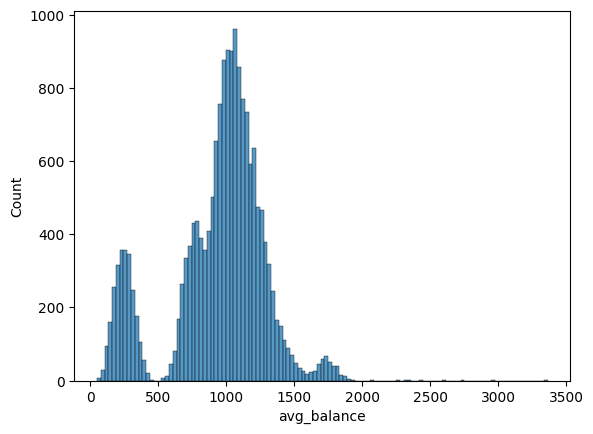

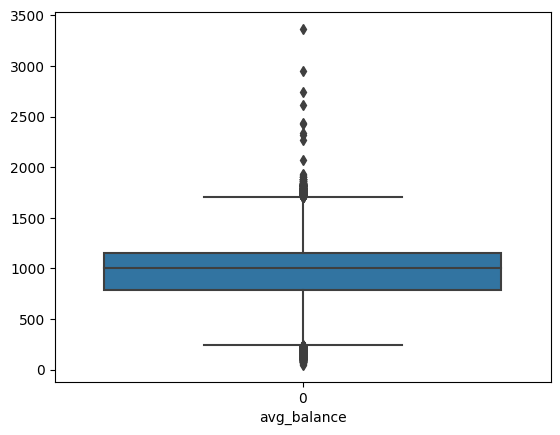

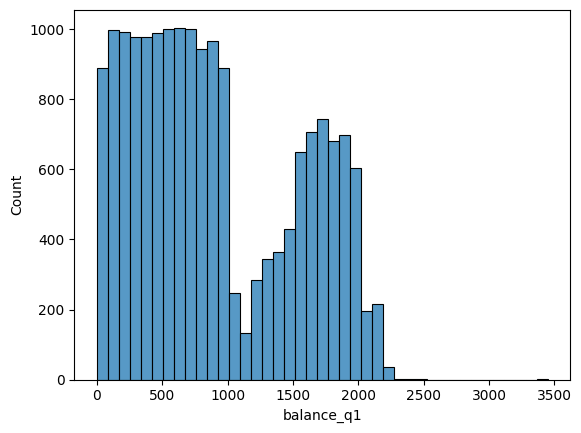

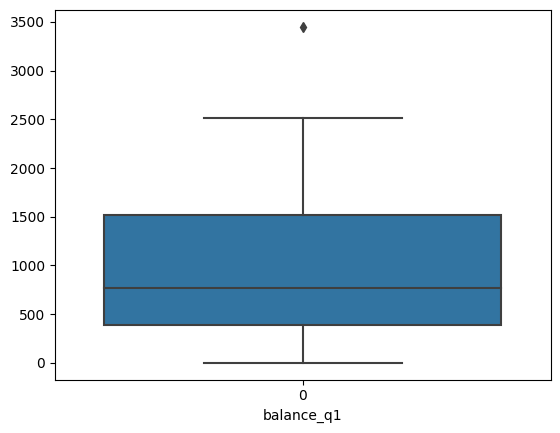

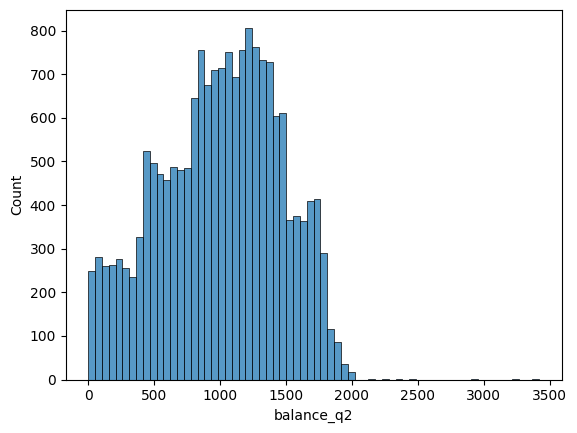

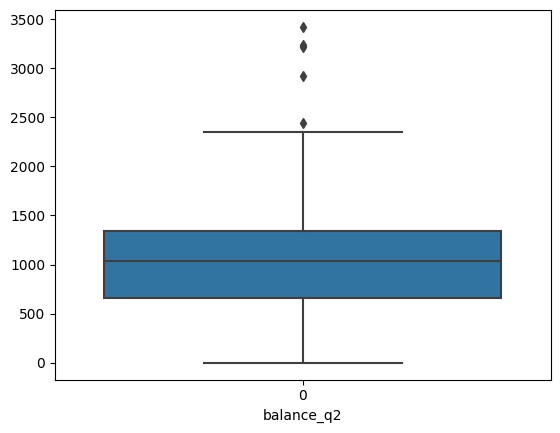

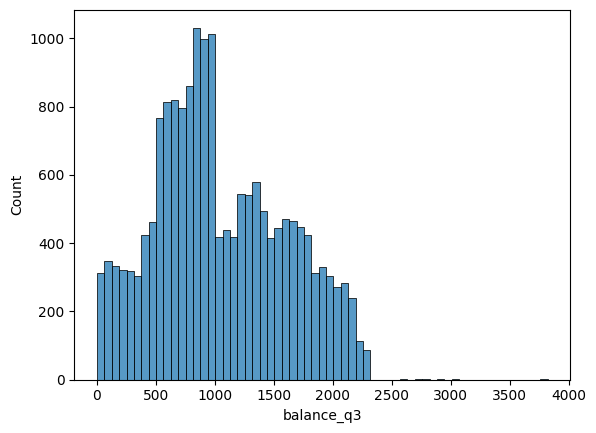

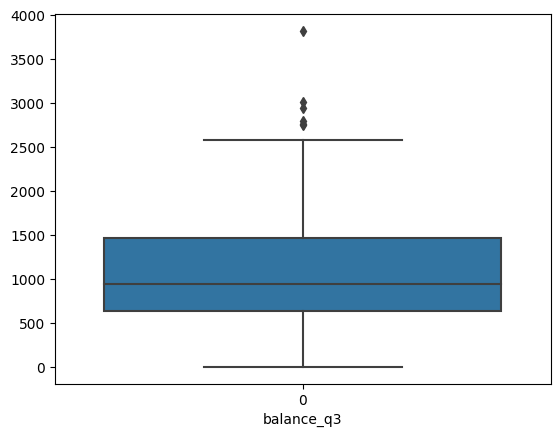

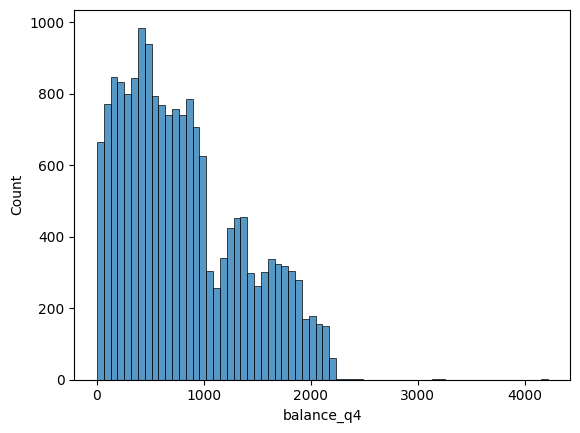

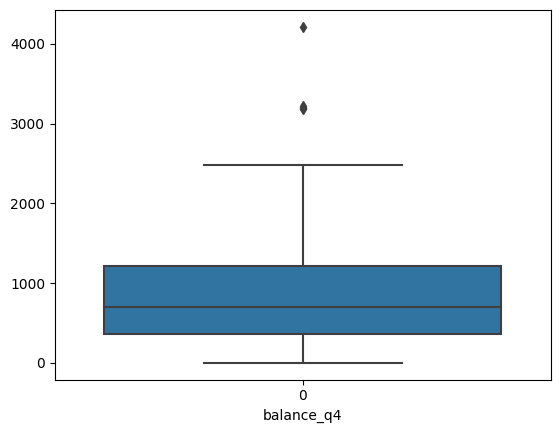

In [17]:
for column in numerical_data.drop(columns=['customer_number']).columns[5:]:
    sns.histplot(numerical_data[column])
    plt.show()
    sns.boxplot(numerical_data[column])
    plt.xlabel(column)
    plt.show()

In [18]:
numerical_data = numerical_data.reset_index(drop = True)

In [19]:
numerical_data

,customer_number,offer_accepted,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
0,1,0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,0,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,0,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,0,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,0,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...
17971,17996,0,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17972,17997,0,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17973,17998,0,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17974,17999,0,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [20]:
numerical_corr = numerical_data.drop(columns=['customer_number', 'offer_accepted']).corr()

In [21]:
numerical_corr

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,balance_q1,balance_q2,balance_q3,balance_q4
bank_accounts_open,1.000000,-0.001633,0.004762,0.008622,-0.003909,-0.002814,-0.007956,0.000190,-0.000356
credit_cards_held,-0.001633,1.000000,-0.002390,-0.003040,-0.003469,-0.009446,-0.007373,-0.007623,0.015362
homes_owned,0.004762,-0.002390,1.000000,0.005227,0.017967,0.013143,0.009758,0.007775,0.014775
household_size,0.008622,-0.003040,0.005227,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232
avg_balance,-0.003909,-0.003469,0.017967,-0.003582,1.000000,0.481507,0.800285,0.752741,0.572380
balance_q1,-0.002814,-0.009446,0.013143,-0.005080,0.481507,1.000000,0.483134,-0.060961,-0.237283
balance_q2,-0.007956,-0.007373,0.009758,-0.008766,0.800285,0.483134,1.000000,0.487710,0.168955
balance_q3,0.000190,-0.007623,0.007775,0.003633,0.752741,-0.060961,0.487710,1.000000,0.565298
balance_q4,-0.000356,0.015362,0.014775,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


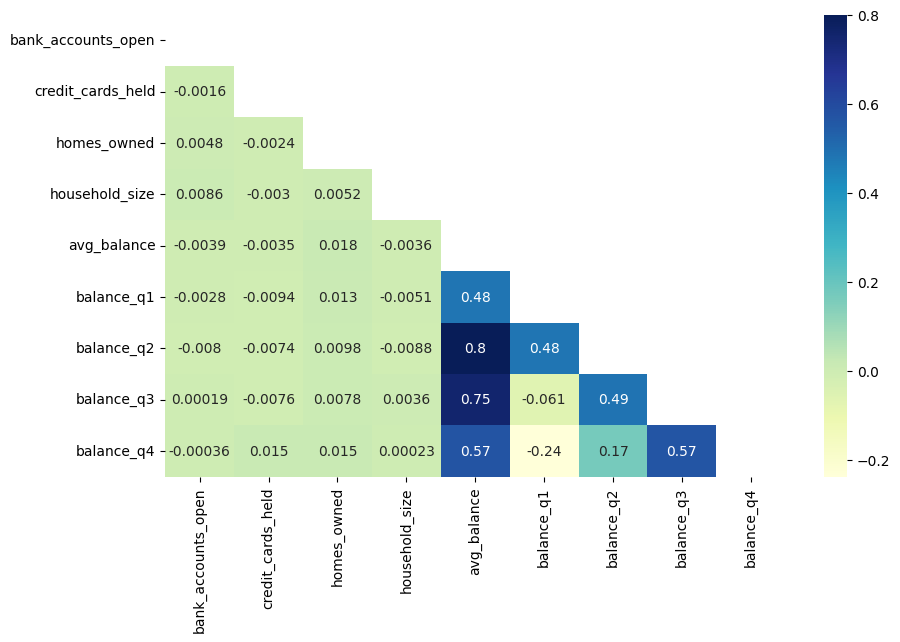

In [22]:
mask = np.triu(numerical_corr)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_corr, cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [23]:
numerical_data = numerical_data.drop(columns=['avg_balance'])

In [24]:
numerical_data

,customer_number,offer_accepted,bank_accounts_open,credit_cards_held,homes_owned,household_size,balance_q1,balance_q2,balance_q3,balance_q4
0,1,0,1,2,1,4,1669.0,877.0,1095.0,1002.0
1,2,0,1,2,2,5,39.0,106.0,78.0,366.0
2,3,0,2,2,1,2,367.0,352.0,145.0,242.0
3,4,0,2,1,1,4,1578.0,1760.0,1119.0,419.0
4,5,0,1,2,1,6,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...
17971,17996,0,1,1,1,5,136.0,65.0,71.0,398.0
17972,17997,0,1,3,1,3,984.0,940.0,943.0,535.0
17973,17998,0,1,2,1,4,918.0,767.0,1170.0,1494.0
17974,17999,0,1,4,2,2,626.0,983.0,865.0,1615.0


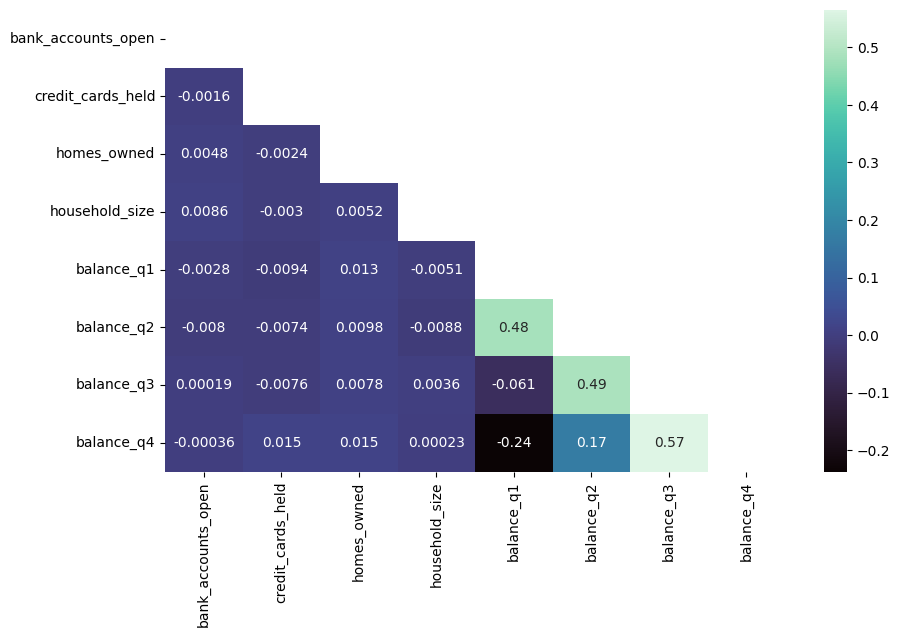

In [25]:
mask = np.triu( numerical_data.drop(columns=['customer_number', 'offer_accepted']).corr())

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.drop(columns=['customer_number', 'offer_accepted']).corr(), cmap="mako", annot=True, mask=mask)
plt.show()

### Categorical data

In [26]:
categorical_data = data.select_dtypes(object)

In [27]:
categorical_data.columns

Index(['reward', 'mailer_type', 'income_level', 'overdraft_protection',
       'credit_rating', 'own_your_home'],
      dtype='object')

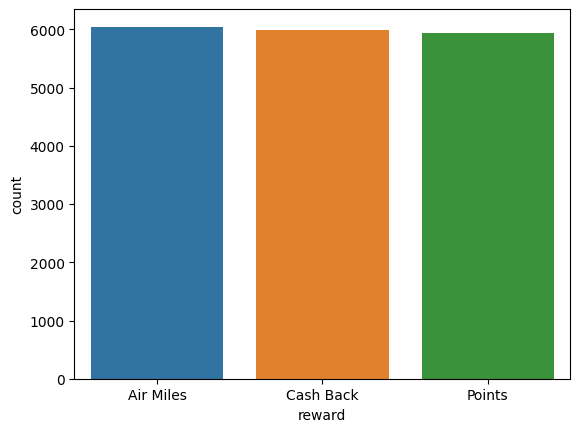

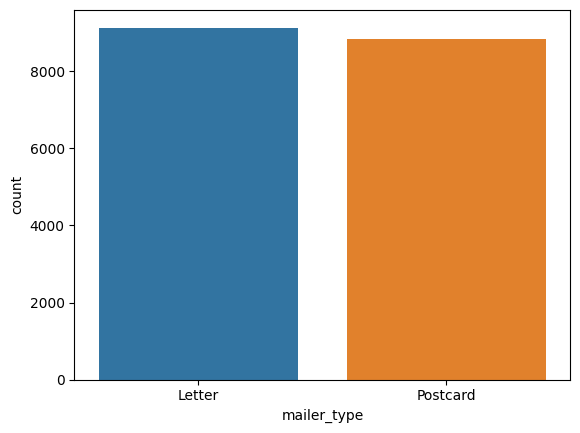

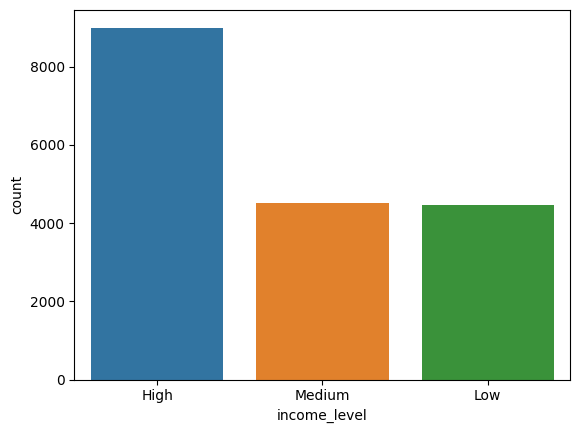

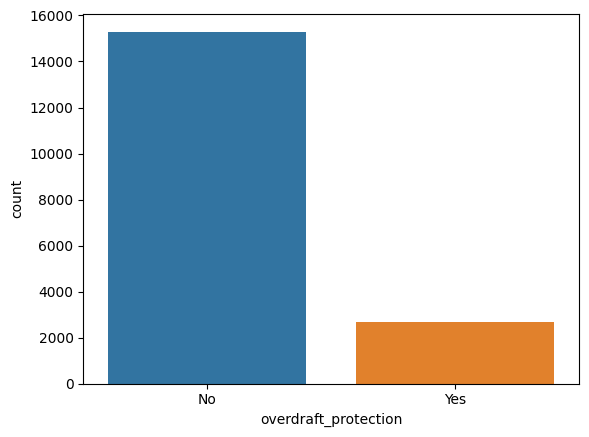

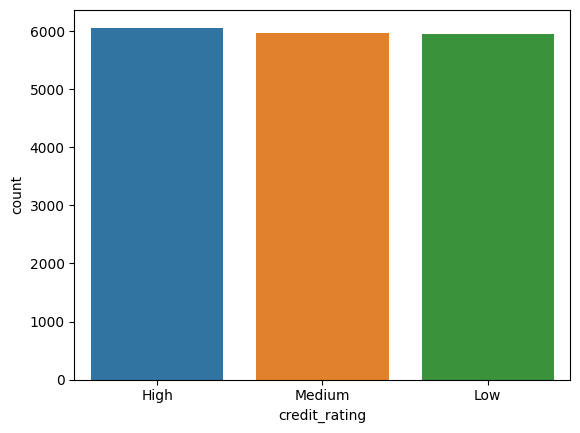

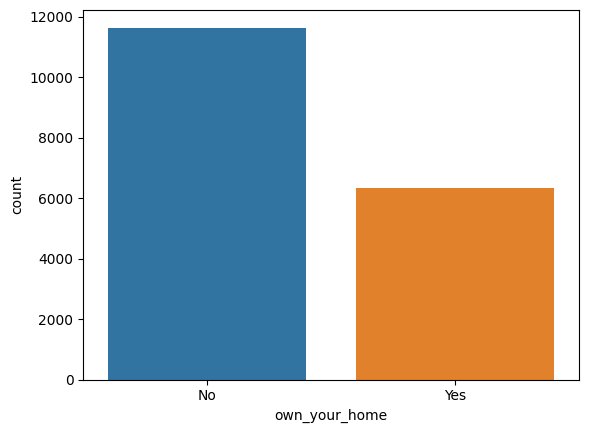

In [28]:
for column in categorical_data.columns:
    sns.barplot(data = data, x = categorical_data[column].unique(), y = categorical_data[column].value_counts(dropna=False))
    plt.xlabel(column)
    plt.show()

In [29]:
# Encoding data
categories = [['Low', 'Medium', 'High']]

ordinal_encoder = OrdinalEncoder(categories=categories)

In [30]:
income_oe_data = ordinal_encoder.fit_transform(categorical_data[['income_level']])

In [31]:
rating_oe_data = ordinal_encoder.fit_transform(categorical_data[['credit_rating']])

In [32]:
categorical_data = categorical_data.drop(columns=['income_level', 'credit_rating'])

In [33]:
categorical_data.columns

Index(['reward', 'mailer_type', 'overdraft_protection', 'own_your_home'], dtype='object')

In [34]:
categorical_data = pd.get_dummies(categorical_data, drop_first=True)

In [35]:
categorical_data = categorical_data.reset_index(drop=True)

In [36]:
categorical_data

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,True,False,True
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
17971,True,False,False,False,True
17972,True,False,False,False,True
17973,True,False,False,False,False
17974,True,False,False,False,True


In [37]:
income_data = pd.DataFrame(income_oe_data, columns=['income_level'])

In [38]:
income_data = income_data.reset_index(drop = True)

In [39]:
income_data

,income_level
0,2.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
17971,2.0
17972,2.0
17973,2.0
17974,1.0


In [40]:
income_data.shape

(17976, 1)

In [41]:
rating_data = pd.DataFrame(rating_oe_data, columns=['credit_rating'])

In [42]:
rating_data = rating_data.reset_index(drop = True)

In [43]:
rating_data

,credit_rating
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0
...,...
17971,0.0
17972,0.0
17973,0.0
17974,1.0


In [44]:
rating_data.shape

(17976, 1)

In [45]:
categorical_data = pd.concat([categorical_data, income_data, rating_data], axis = 1)

In [46]:
categorical_data

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,income_level,credit_rating
0,False,False,False,False,False,2.0,2.0
1,False,False,False,False,True,1.0,1.0
2,False,False,True,False,True,2.0,1.0
3,False,False,False,False,False,1.0,2.0
4,False,False,False,False,True,1.0,1.0
...,...,...,...,...,...,...,...
17971,True,False,False,False,True,2.0,0.0
17972,True,False,False,False,True,2.0,0.0
17973,True,False,False,False,False,2.0,0.0
17974,True,False,False,False,True,1.0,1.0


### Get dataframe to it use into analysis

In [47]:
full_data = pd.concat([numerical_data, categorical_data], axis = 1).reset_index(drop = True)

In [48]:
full_data.columns = full_data.columns.str.lower().str.replace(' ', '_')

In [49]:
full_data

,customer_number,offer_accepted,bank_accounts_open,credit_cards_held,homes_owned,household_size,balance_q1,balance_q2,balance_q3,balance_q4,reward_cash_back,reward_points,mailer_type_postcard,overdraft_protection_yes,own_your_home_yes,income_level,credit_rating
0,1,0,1,2,1,4,1669.0,877.0,1095.0,1002.0,False,False,False,False,False,2.0,2.0
1,2,0,1,2,2,5,39.0,106.0,78.0,366.0,False,False,False,False,True,1.0,1.0
2,3,0,2,2,1,2,367.0,352.0,145.0,242.0,False,False,True,False,True,2.0,1.0
3,4,0,2,1,1,4,1578.0,1760.0,1119.0,419.0,False,False,False,False,False,1.0,2.0
4,5,0,1,2,1,6,2140.0,1357.0,982.0,365.0,False,False,False,False,True,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,17996,0,1,1,1,5,136.0,65.0,71.0,398.0,True,False,False,False,True,2.0,0.0
17972,17997,0,1,3,1,3,984.0,940.0,943.0,535.0,True,False,False,False,True,2.0,0.0
17973,17998,0,1,2,1,4,918.0,767.0,1170.0,1494.0,True,False,False,False,False,2.0,0.0
17974,17999,0,1,4,2,2,626.0,983.0,865.0,1615.0,True,False,False,False,True,1.0,1.0


## Check data balance (classes)

In [50]:
accepted, not_accepted = full_data['offer_accepted'].value_counts()

In [51]:
print('Percentage of those clients that accepted the offer: {: .2f}%'.format(accepted / (accepted + not_accepted) * 100))
print("Percentage of those clients that didn't accept the offer: {: .2f}%".format(not_accepted / (accepted + not_accepted) * 100))

Percentage of those clients that accepted the offer:  94.32%
Percentage of those clients that didn't accept the offer:  5.68%


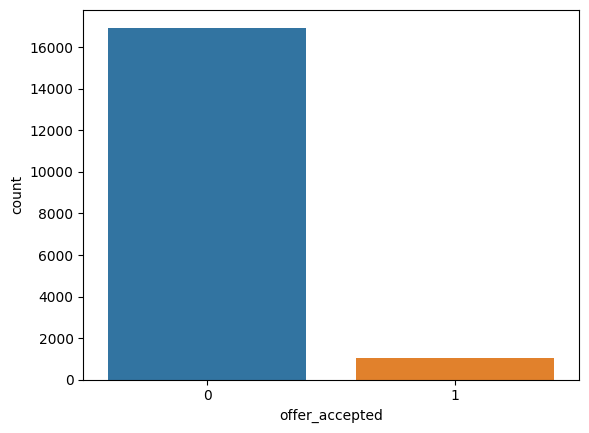

In [52]:
sns.countplot(x = full_data['offer_accepted'], data = full_data)
plt.show()

* We can notice that we have imbalanced into our target.

## Split into train and test dataset

In [53]:
y = full_data['offer_accepted']

In [54]:
y.shape

(17976,)

In [55]:
X = full_data.drop(columns=['offer_accepted'])

In [56]:
X.shape

(17976, 16)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
y_train.shape

(14380,)

In [89]:
y_test.shape

(3596,)

## Train model

### Initial model

In [58]:
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500)

In [59]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [60]:
logistic_reg.n_iter_

array([177])

In [61]:
train_pred = logistic_reg.predict(X_train)

In [62]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
test_pred = logistic_reg.predict(X_test)

In [64]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Using balanced data

In [65]:
count_classes = full_data['offer_accepted'].value_counts()

In [66]:
count_classes

offer_accepted
0    16955
1     1021
Name: count, dtype: int64

In [67]:
count_classes[0] / full_data.shape[0]

0.9432020471740098

In [68]:
(count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])

0.8864040943480196

#### Oversampling

In [69]:
ros = RandomOverSampler(random_state=42)

In [70]:
X_train_over, y_train_over = ros.fit_resample(X_train,y_train)

In [71]:
y_train_over.value_counts()

offer_accepted
0    13550
1    13550
Name: count, dtype: int64

In [72]:
print('Resampled dataset shape %s' % Counter(y_train_over))

Resampled dataset shape Counter({0: 13550, 1: 13550})


#### Undersampling

In [73]:
rus = RandomUnderSampler(random_state=42)

In [74]:
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [75]:
y_train_under.value_counts()

offer_accepted
0    830
1    830
Name: count, dtype: int64

In [76]:
print('Resampled dataset shape %s' % Counter(y_train_under))

Resampled dataset shape Counter({0: 830, 1: 830})


#### SMOTE

In [77]:
sm = SMOTE(random_state=100, k_neighbors=5)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [78]:
y_train_SMOTE.value_counts()

offer_accepted
0    13550
1    13550
Name: count, dtype: int64

In [79]:
print('Resampled dataset shape %s' % Counter(y_train_SMOTE))

Resampled dataset shape Counter({0: 13550, 1: 13550})


#### Tomeklinks

In [80]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)
y_train_tl.value_counts()

offer_accepted
0    13167
1      830
Name: count, dtype: int64

In [81]:
print('Resampled dataset shape %s' % Counter(y_train_tl))

Resampled dataset shape Counter({0: 13167, 1: 830})


## Test model

### Initial model

In [82]:
print("Train accuracy initial model: {:.2f}".format(logistic_reg.score(X_train, y_train)))
print("Test accuracy initial model: {:.2f}".format(logistic_reg.score(X_test, y_test)))

Train accuracy initial model: 0.94
Test accuracy initial model: 0.95


In [83]:
cm_train = confusion_matrix(y_train, train_pred)
cm_test = confusion_matrix(y_test, test_pred)

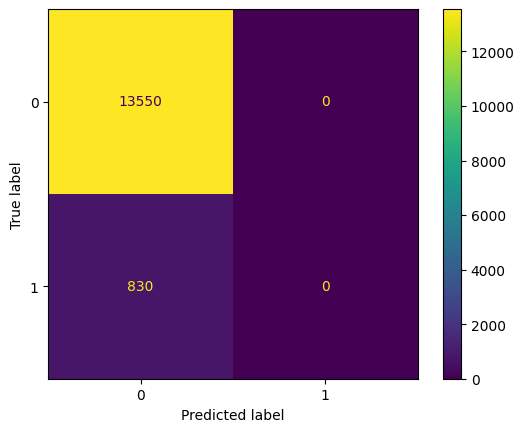

In [84]:
disp = ConfusionMatrixDisplay(cm_train, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

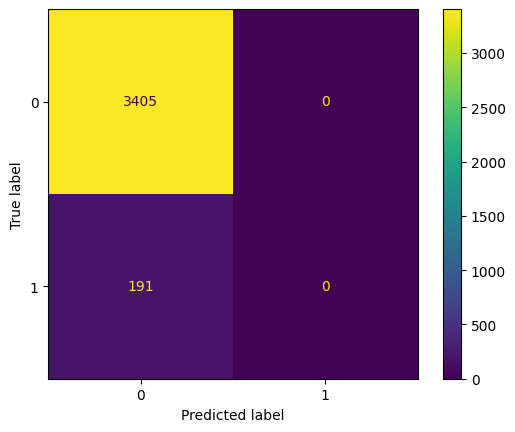

In [85]:
disp = ConfusionMatrixDisplay(cm_test, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

In [95]:
y_pred_test_init = logistic_reg.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_init)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_init)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_init)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_init)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_init)))

The accuracy in the TEST set is: 0.95
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


C:\Users\leo_k\Documents\Ironhack\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using oversampling

In [86]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_over, y_train_over)
y_pred_test_ros = lr.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_ros)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_ros)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_ros)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_ros)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_ros)))

The accuracy in the TEST set is: 0.67
The precision in the TEST set is: 0.11
The recall in the TEST set is: 0.74
The F1 in the TEST set is: 0.19
The Kappa in the TEST set is: 0.11


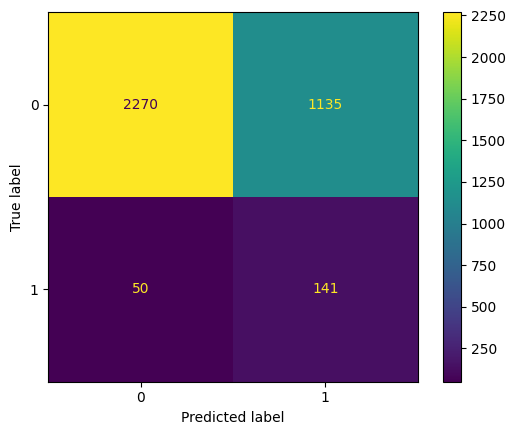

In [87]:
cm_test = confusion_matrix(y_test,y_pred_test_ros)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### Using undersampling

In [90]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_under, y_train_under)
y_pred_test_rus = lr.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_rus)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_rus)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_rus)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_rus)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_rus)))

The accuracy in the TEST set is: 0.65
The precision in the TEST set is: 0.10
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.18
The Kappa in the TEST set is: 0.09


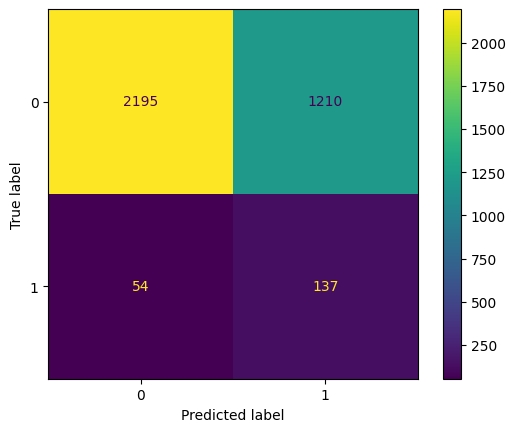

In [91]:
cm_test = confusion_matrix(y_test,y_pred_test_rus)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### Using SMOTE

In [92]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test_SMOTE = lr.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_SMOTE)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_SMOTE)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_SMOTE)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_SMOTE)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_SMOTE)))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.10
The recall in the TEST set is: 0.39
The F1 in the TEST set is: 0.16
The Kappa in the TEST set is: 0.08


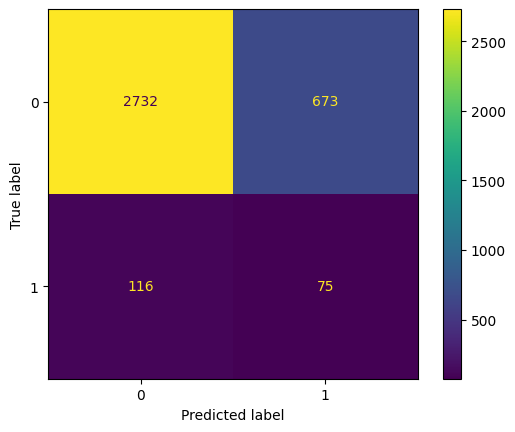

In [93]:
cm_test = confusion_matrix(y_test,y_pred_test_SMOTE)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### Using Tomeklink

In [94]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tl, y_train_tl)
y_pred_test_tl = lr.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_tl)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_tl)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_tl)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_tl)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_tl)))

The accuracy in the TEST set is: 0.95
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


C:\Users\leo_k\Documents\Ironhack\ironhack\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
